<a href="https://colab.research.google.com/github/SampathPiriya/Personal-Files/blob/master/Exploratory%20data%20analysis%20of%20haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving haberman.csv to haberman (2).csv


In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv(io.BytesIO(uploaded['haberman.csv']))

In [ ]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


In [ ]:
#(Q) What are the column names in our dataset?
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
#(Q) How many data points for each class are present? 


haberman["status"].value_counts()
# balanced-dataset vs imbalanced datasets
#habermans is a imbalanced dataset as the number of data points for one class is more.

1    225
2     81
Name: status, dtype: int64

In [ ]:
haberman.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


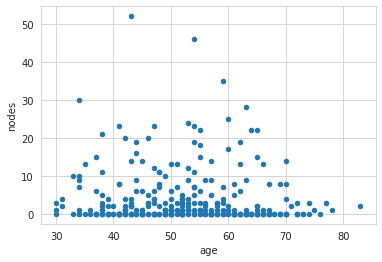

In [ ]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='age', y='nodes') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


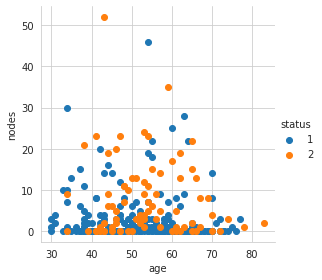

In [ ]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

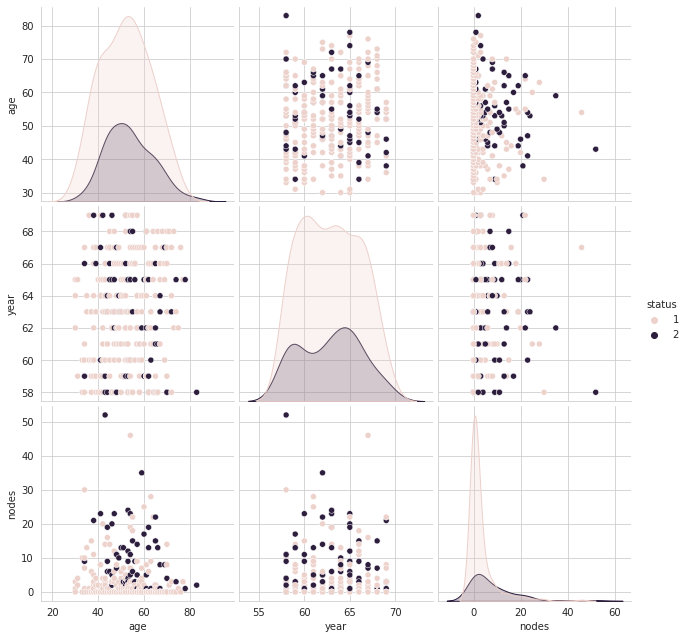

In [ ]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

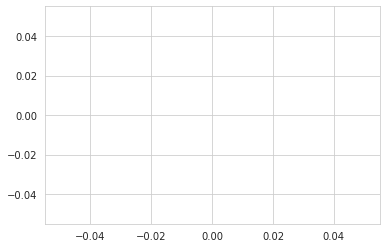

In [ ]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
haberman_1 = haberman.loc[haberman["status"] == "1"];
haberman_0 = haberman.loc[haberman["status"] == "0"];
#haberman_nodes = haberman.loc[haberman["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(haberman_1["nodes"], np.zeros_like(haberman_1['nodes']), 'o')
plt.plot(haberman_0["nodes"], np.zeros_like(haberman_0['nodes']), 'o')
#plt.plot(haberman_virginica["petal_length"], np.zeros_like(haberman_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


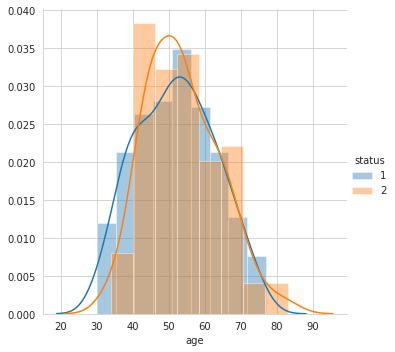

In [ ]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


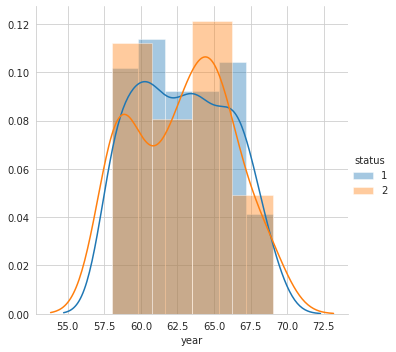

In [ ]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


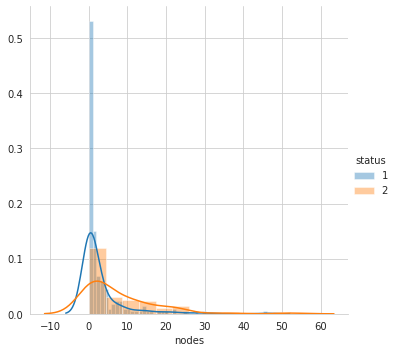

In [ ]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

In [ ]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


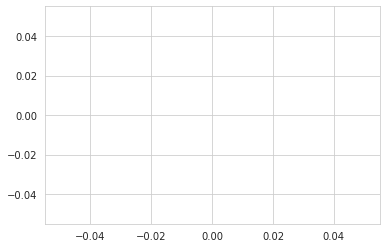

In [ ]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(haberman_0['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_0['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


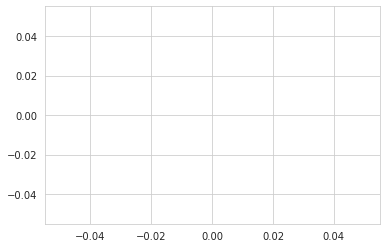

In [ ]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(haberman_0['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[nan nan nan nan nan nan nan nan nan nan]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


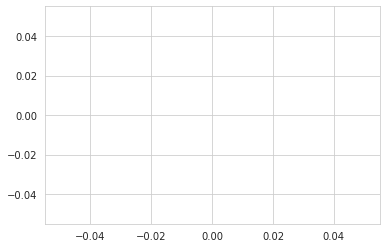

In [ ]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(haberman_0['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
#counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
 #                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

In [ ]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_0["nodes"]))
#Mean with an outlier.
print(np.mean(np.append(haberman_0["nodes"],150)));
print(np.mean(haberman_1["nodes"]))
#print(np.mean(iris_versicolor["age"]))

print("\nStd-dev:");
print(np.std(haberman_0["nodes"]))
print(np.std(haberman_1["nodes"]))
#print(np.std(iris_versicolor["age"]))



Means:
nan
150.0
nan

Std-dev:
nan
nan


In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_0["nodes"]))
#Median with an outlier
print(np.median(np.append(haberman_0["nodes"],50)));
print(np.median(haberman_1["nodes"]))
#print(np.median(haberman_1["age"]))


print("\nQuantiles:")
print(np.percentile(haberman_0["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_1["nodes"],np.arange(0, 100, 25)))
#print(np.percentile(haberman_versicolor["age"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_0["nodes"],90))
print(np.percentile(haberman_1["nodes"],90))
#print(np.percentile(haberman_versicolor["age"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_0["nodes"]))
print(robust.mad(haberman_1["nodes"]))
#print(robust.mad(haberman_versicolor["age"]))



Medians:
nan
50.0
nan

Quantiles:


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: ignored

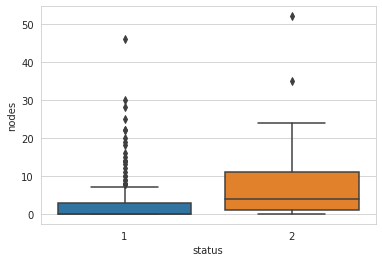

In [ ]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

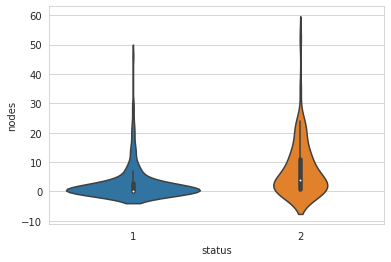

In [ ]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.show()

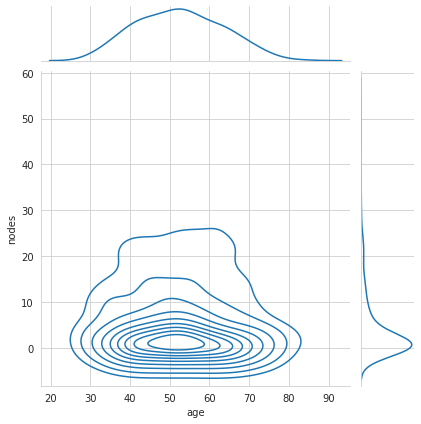

In [ ]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="nodes", data=haberman, kind="kde");
plt.show();
